# Checkpoint 2: Convolutional neural networks and autoencoders
---
*Responsible:* Guillermo Hamity (<ghamity@ed.ac.uk>)



In this checkpoint exercise we will use the Quick Draw dataset. 

The Quick Draw Dataset is a collection of 50 million drawings across 345 categories, contributed by players of the game Quick, Draw!. The bitmap dataset contains these drawings converted from vector format into 28x28 grayscale images.

We will focus on a subset of 10 classes of type "body part"

The class labels are:

![listbodypart](./list_body_parts.png)

| <p align='left'> Label                   | <p align='left'> Description| 
| ---------------------------------------- | --------------------------- |
| <p align='left'> 0                       | <p align='left'> arm        |
| <p align='left'> 1                       | <p align='left'> ear        | 
| <p align='left'> 2                       | <p align='left'> eye        |  
| <p align='left'> 3                       | <p align='left'> face      | 
| <p align='left'> 4                       | <p align='left'> foot       | 
| <p align='left'> 5                       | <p align='left'> hand       | 
| <p align='left'> 6                       | <p align='left'> knee       |
| <p align='left'> 7                       | <p align='left'> leg        |
| <p align='left'> 8                       | <p align='left'> mouth      |
| <p align='left'> 9                       | <p align='left'> nose     |


Players draw items as quickly as possible, and as you can see, some images are quite bad! We will try and train a CNN classifier to anyway see if we can train a model to distinguish the classes. We will then train an autoencoder to learn a laten space representations of the dataset.

    
This week, like last, I am not providing example notebooks like `lecture2.ipynb` and `data-science-tools.ipynb` for Unit 2, though these may still be useful to you. Instead, I am **providing the imports for all of the modules and classes that you should need.** 

### Notes on assessment
* Try and calculate the answers to the exercises provided. If you are unable to complete the question, describe which approach you _would_ have taken to solve the problem
* Code must be understandable and reproducible. Before grading the notebook kernel **may** be restarted and re-run, so make sure that your code can run from start to finish without any (unintentional) errors
* If you are unsure on how to proceed please **ask one of the TAs** during the workshop
- Notebooks should be submitted by **10am on Friday 22 October 2021** 
- This CP exercise sheet is divided into **5 sections** giving a maximum of **10 marks** in total:

| <p align='left'> Title          | <p align='left'> Exercise nos. | <p align='center'> Number of marks |
| ---------------------------------------- | --------------------- | -------------------- |
| <p align='left'> 1. Visualisation and Abstraction   | <p align='left'>   1  | <p align='left'> 1.5 |
| <p align='left'> 2. Image classification | <p align='left'> 2–5  | <p align='left'> 3.5 | 
| <p align='left'> 3. Auto-encoders        | <p align='left'> 6–9  | <p align='left'> 3.0 |
| <p align='left'> 4. Anomaly detection    | <p align='left'> 10–11| <p align='left'> 2.0 |
| <p align='left'> **Total**               |                       | <p align='left'> **10** |

---
You can find the dataset for download at [this link](https://cernbox.cern.ch/index.php/s/obvLeyMR0JEEa5p).
---
---

## Preamble
---

In [1]:
# Standard import(s)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd


C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\daml\lib\site-packages\tensorflow\python\frame

In [2]:
# Keras import(s)
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import regularizers

from tensorflow.python.keras.backend import set_image_data_format
set_image_data_format('channels_last')  # Images are formatted as (N, N, 1), with colour-channels last

## Data preprocessing (given, not marked)
---

First, we'll load in the preprocessed dataset from a numpy data file, which has already been split into training and testing parts for us.



* Each image has been **Reshaped to** $(N,N,1)$ dimension, i.e. image has one color dimention
* Images have been **Scaled** to have pixel intensities in the range [0,1]. It is an important step before feeding them to the neural network model, by dividing the values by 255. It's important that the training set and the testing set be preprocessed in the same way.
* Dataset was **Shuffled** for both training and testing datasets separately.
* Check the shapes of the resulting arrays; make sure they look as you expect.

In [3]:
#Load quickdraw bodyparts dataset
X_train, y_train, X_test, y_test = np.load('quickdraw_bodyparts.npy',allow_pickle=True) 


In [4]:
#Image labels
body_parts = ['arm', 'ear', 'eye', 'face','foot', 'hand', 'knee', 'leg', 'mouth','nose']

In [5]:
# Each label of the dataset correspond to a class name
class_names = body_parts

nb_train   = X_train.shape[0]
nb_test    = X_test.shape[0]
nb_classes = y_train.max() + 1
print("Number of training examples: {}".format(nb_train))
print("Number of testing  examples: {}".format(nb_test))
print("Number of target classes:    {}".format(nb_classes))

# Get image shape
shape = X_train.shape[1:]
print("Image shape:  {}".format(shape))

print(X_train.shape)

Number of training examples: 160000
Number of testing  examples: 40000
Number of target classes:    10.0
Image shape:  (28, 28, 1)
(160000, 28, 28, 1)


## Image visualisation and abstraction (1.5 marks)

#### 1. Display images of the training dataset, and check that the associated label makes sense (0.5 mark)

You will use `matplotlib.pyplot`, the `plt.imshow` method. Use the `cmap=plt.cm.binary` color map for all subsequent img plots.

1. plot 10 training dataset images, one per category. Label the images.

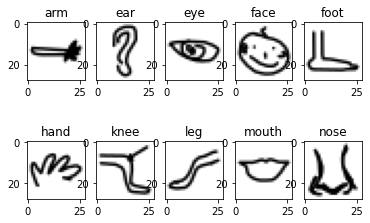

In [49]:
#Plotting the images as subplots via imshow:

plt.figure(0)

plt.subplot(2,5,1)
plt.imshow(X_train[20],cmap=plt.cm.binary)
plt.title(body_parts[0])

plt.subplot(2,5,2)
plt.imshow(X_train[17],cmap=plt.cm.binary)
plt.title(body_parts[1])

plt.subplot(2,5,3)
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.title(body_parts[2])

plt.subplot(2,5,4)
plt.imshow(X_train[11],cmap=plt.cm.binary)
plt.title(body_parts[3])

plt.subplot(2,5,5)
plt.imshow(X_train[5],cmap=plt.cm.binary)
plt.title(body_parts[4])

plt.subplot(2,5,6)
plt.imshow(X_train[3],cmap=plt.cm.binary)
plt.title(body_parts[5])

plt.subplot(2,5,7)
plt.imshow(X_train[34],cmap=plt.cm.binary)
plt.title(body_parts[6])

plt.subplot(2,5,8)
plt.imshow(X_train[25],cmap=plt.cm.binary)
plt.title(body_parts[7])

plt.subplot(2,5,9)
plt.imshow(X_train[36],cmap=plt.cm.binary)
plt.title(body_parts[8])

plt.subplot(2,5,10)
plt.imshow(X_train[7],cmap=plt.cm.binary)
plt.title(body_parts[9])

plt.show()

2. plot the fist 25 images in a 5x5 plot. Label the images.

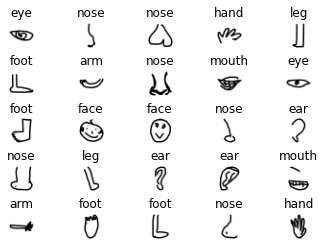

In [7]:
#Using subplot to make a 5x5 plot
count = 0

fig, axes = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        axes[i,j].imshow(X_train[count],cmap=plt.cm.binary)
        axes[i,j].set_title(body_parts[int(y_train[count])])
        axes[i,j].set_axis_off() #Turn off axes
        count +=1
plt.subplots_adjust(hspace=0.8)
plt.show()

#### 2 Apply different kernels to an image of type face (1 mark)

1. pick an image of the face type and save it to `myface`. Plot it with `imshow` (nothing fancy needed for the plot)

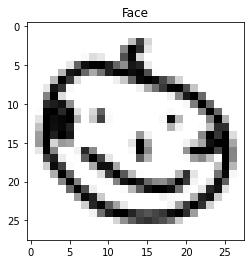

In [8]:
#plotting the first face I saw
myface = X_train[11]
plt.imshow(myface,cmap=plt.cm.binary)
plt.title("Face")
plt.show()

2. Define 4 kernels: identity, edge_detection, sharpening, and blurring, as `3x3` numpy arrays. We add them to a dictionary of kernels.

In [9]:
#The kernels were taken from the lecture slides and copied here
k_identity = np.array(([0,0,0],[0,1,0],[0,0,0]))
k_edge= np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]))
k_sharp= np.array(([0,-1,0],[-1,5,-1],[0,-1,0]))
k_blur = np.ones((3,3))/9
kernels = {"identity":k_identity,"edge":k_edge,"sharp":k_sharp,"blur":k_blur}

3. Given is part of the `run_kernel` function which runs over the figure and applies the kernel to every non-edge pixel. Complete the function:
    - Define the shape of the output image `np.empty(...)`
    - Define the ranges of the row and colum loops , i.e. `range(...)`
    - Define the fig index on which the kernel is multiplied in each step, ie. `fig[....]`



In [10]:
def run_kernel(fig,kernel):
    #empty array holding the output image. Define the output dimensions as excercise.
    out = np.empty((26,26)) #The array is 28x28 so by sliding a 3x3 matrix across gives a 26x26 output
    for i in range(26):
        for j in range(26): #square matrix so i & j are the same size
            out[i][j] = np.sum(np.multiply(kernel,fig[i:i+3,j:j+3,0])) #We slide the 3x3 matrix across each time
                
    return out

4. run the plotting code block below and check that the kernels are doing what you expect.
    
Since some kernels multiply by negatives, we use the norm=norm(0,1) to scale the image back to between 0 and 1 before plotting. 

In [11]:
#Import the normiliser for the bitmap
from matplotlib.colors import Normalize as norm

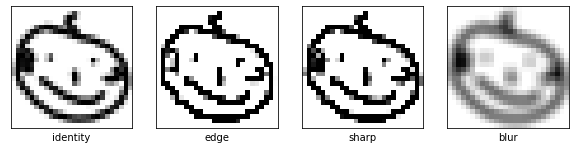

In [12]:
plt.figure(figsize=(10,10))
#Loop over kernel
for i,kernel in enumerate(kernels):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #return transformed image and plot it
    plt.imshow(run_kernel(myface,kernels[kernel]), cmap=plt.cm.binary,norm=norm(0,1))  
    plt.xlabel(kernel)
plt.show()

#This appears to have done exactly as expected so the function above works!

## Image classification (3.5 mark)
---
In this section, we will train a convolutional neural network (CNN) to perform hand-written digit recognition; a standard form of image classification. We will:
- create the model
- train the model
- evaluate its classification performance

#### 3. Define a Convolutional Neural Network suitable for image classification (1 mark).

* Use the **`Keras` functional API** to construct the model. 
* The shape of the input layer should match the shape of the prepared images.
* Add some **convolutional** and **pooling** layers in a sensible configuration. The architecture is a bit up to you, but try to reach a good level of accuracy. Around 85% on validation seems easily achievable.
    * By default, you can use $3 \times 3$ kernels, ReLU activation, and $2\times 2$ pooling; but feel free to play around with different values.
    * By default no padding is applied. You could try "same" padding in order to use the whole image, though results don't change much for me.
    * If sufferening from large overtraining 
* **Flatten** the output of the last convolutional layer.
* Connect it, to an **output** layer with the appropriate number of nodes and choice of activation function.
* Display the model architecture using the `<model>.summary()` method. Optionally display it also with the `plot_model(<model>, show_shapes=True)` method.  
* Questions:
    * _What are the number of trainable parameters in the model?_
    * _How many trainable parameters does your first convolutional layer have? Why?_
    * _Which layer has the most trainable parameters?_

In [13]:
inp = Input(shape=shape) #The shape was defined above and is (28,28,1)
conv1 = Conv2D(24,(3,3),activation='relu')(inp) #Start off with 24 filters (which will halve each time) and a 3x3 kernel
pool1 = MaxPooling2D(pool_size=(2,2))(conv1) #Pooling it and thus dividing the shape by 2
conv2 = Conv2D(12,(3,3),activation='relu')(pool1) #another convoluted layer
pool2 = MaxPooling2D(pool_size=(2,2))(conv2) #Pooling for the final time 
flat = Flatten()(pool2) #flattening to make it 1D
hidden = Dense(10, activation='relu')(flat) #Hidden layer to improve NN
output = Dense(10, activation='sigmoid')(hidden) #10 outputs for each feature
model = Model(inputs=inp, outputs=output)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
#This loss function is used as we're categorising the data with probabilities 0->1 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 12)        2604      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3010  

There are a total of 5,964 trainable parameters in the model and the first convolution layer has 240 trainable parameters. The reason for this is because the kernel has 10 free parameters (it's 3x3 so 3x3=9 nodes plus 1 bias) and I have defined 24 output filters in the convolution. Therefore, there are 10x24=240 trainable parameters in the first layer.

The hidden layer has the most trainable parameters.

#### 4. Compile and train the CNN image classifier (1 mark)

* Choose the appropriate loss functiton. 
* Fit for a reasonable number of epochs, use 20% of data for validation. 
* Plot the loss curve(s) by using `matplotlib.pyplot` directly with the information in the `<model>.history.history` dict.
* If you run on CPUs, stretch your legs while you wait for the 20 epoches to complete. Now is a good time for a coffee/loo break!

In [15]:
history = model.fit(x=X_train,y=y_train,batch_size=32,epochs=20,validation_split=0.2,shuffle=True)

Train on 128000 samples, validate on 32000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
128000/128000 [==============================] - 72s 563us/sample - loss: 0.9350 - acc: 0.6935 - val_loss: 0.7457 - val_acc: 0.7643
Epoch 2/20
128000/128000 [==============================] - 74s 574us/sample - loss: 0.6731 - acc: 0.7909 - val_loss: 0.6549 - val_acc: 0.7952
Epoch 3/20
128000/128000 [==============================] - 64s 502us/sample - loss: 0.6272 - acc: 0.8037 - val_loss: 0.6217 - val_acc: 0.8048
Epoch 4/20
128000/128000 [==============================] - 62s 484us/sample - loss: 0.6010 - acc: 0.8122 - val_loss: 0.6018 - val_acc: 0.8111
Epoch 5/20
128000/128000 [==============================] - 61s 479us/sample - loss: 0.5832 - acc: 0.8180 - val_loss: 0.5910 - val_acc: 0.8147
Epoch 6/20
128000/128000 [==============================] - 62s 482us/sample - loss: 0.5685 - acc: 0.8211 - val_loss: 0.5994 - val_acc: 0.81

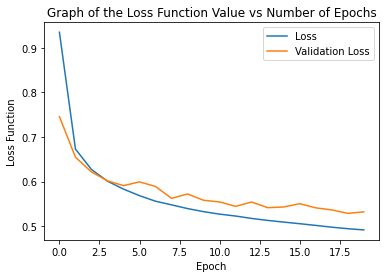

In [16]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Graph of the Loss Function Value vs Number of Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss Function")
plt.legend()
plt.show()

#The loss functions keep decreasing so no overtraining is yet occuring
#In fact, it could have been run for a few more epochs as the validation
#loss could still decrease

#### 5. Evaluate the classification performance on the testing dataset (1 Mark)

* Compute the testing accuracy, _e.g._ using the `<model>.evaluate()` method. Compare to the training accuracy; can be read off from fit printout, if you added the `'accuracy'` metric, or can be calculated here.
* Display a few mis-classified images from the test dataset.
    * For this you will need to use the model to predict from the testing features.
    * This yields arrays of 10 probabilities, 1 per class. Get the index from maximum probability to find the class prediction. Maybe consider using `argmax`?
* Compute and display the confusion matrix (normalise by truth label). Discuss the results.

In [17]:
loss,metric = model.evaluate(x=X_test,y=y_test,batch_size=32,verbose=0) #calculating loss from testing data

print('The accuracy from the evaluate method = '+str(metric))
print('The accuracy from the fit printout = '+str(history.history['acc'][9]))

#The testing data accuracy is very close to the training accuracy so it's a good neural network!

The accuracy from the evaluate method = 0.82885
The accuracy from the fit printout = 0.8315625


Misclassified image at index = 0
Misclassified image at index = 5
Misclassified image at index = 12
Misclassified image at index = 26
Misclassified image at index = 35
Misclassified image at index = 38
Misclassified image at index = 45
Misclassified image at index = 47
Misclassified image at index = 52
Misclassified image at index = 55
Misclassified image at index = 66
Misclassified image at index = 69
Misclassified image at index = 70
Misclassified image at index = 71
Misclassified image at index = 72
Misclassified image at index = 75
Misclassified image at index = 80
Misclassified image at index = 86
Misclassified image at index = 91
Misclassified image at index = 94
Misclassified image at index = 96


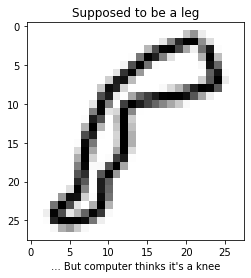

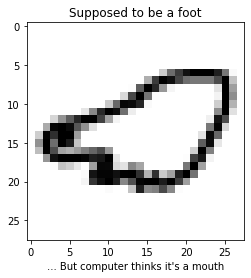

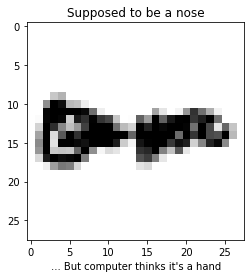

In [18]:
#showing the first few mispredicted images

#using the model to predict the images
prediction = np.argmax(model.predict(X_test),axis=1)
misclassified = []

#Finding out where it goes wrong for the first 100 images (a full sample would be too much for us to handle!)
for i in range(100):
    if prediction[i] != y_test[i]:
        print("Misclassified image at index = "+str(i))
        misclassified.append(i)

#plotting the first 3 misclassified images
for j in range(3):
    plt.imshow(X_test[misclassified[j]],cmap=plt.cm.binary)
    plt.title("Supposed to be a "+str(body_parts[int(y_test[misclassified[j]])]))
    plt.xlabel("... But computer thinks it's a "+str(body_parts[prediction[misclassified[j]]]))
    plt.show()

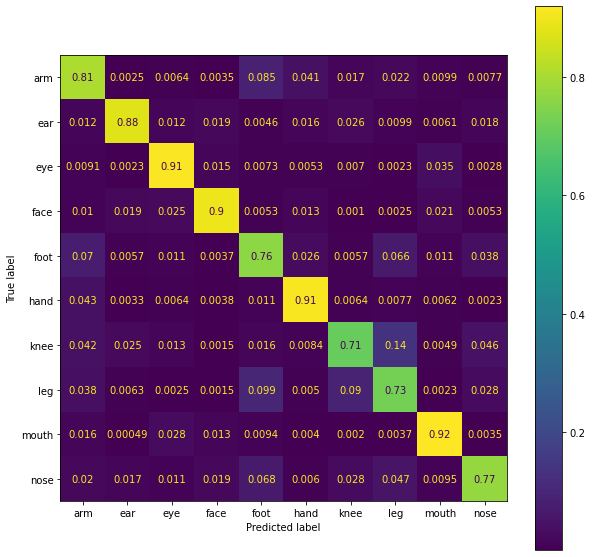

In [19]:
#Plotting the confusion matrix

#imporint confusionmatrixdisplay
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize=(10, 10))
#Define the confusion matrix and normalise it so that each row/column sums to 1
cmat = confusion_matrix(y_test,prediction,normalize='true')
#dispay the matrix and redefine the display labels to show the weather type
cmatplot = ConfusionMatrixDisplay(confusion_matrix=cmat,display_labels=body_parts)

cmatplot.plot(ax=ax)
plt.show()

From the confusion matrix, we can see that it's pretty good at finding the correct image. The unambigious ones -- face, eye, hand, mouth and nose -- are the best whilst the ambigious ones -- arm, leg, foot and knee -- are the worst. Looking at the images, I can barely tell the difference between a leg, knee & a foot myself, and an arm often looks like a foot too so I expect these to be the lowest.

In fact, we can see from this matrix that the computer gets confused between these too as they have the highest rates of misidentification. For example, the highest off diagonal term is for the knee and leg (0.14) which is an incredibly vague difference to spot -- even for a human. Therefore, these results are not at all surprising and it's a good proof that certain body parts are harder to clearly draw than others!

For your own interest (not marked) run the first layer kernels over `myface`. You should see several copies of the image, all with varying transformations. In your training you may find different kernels, but I can clearly spot a bluring kernel in my first layer.

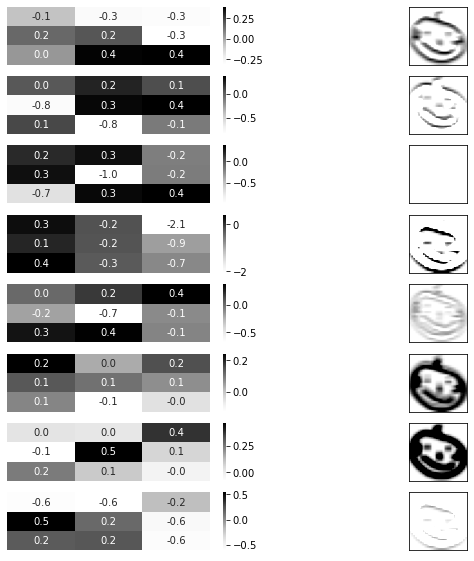

In [20]:
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(8,2,2*(i)+1)

    sns.heatmap(model.layers[1].get_weights()[0][:,:,:,i][:,:,0], cmap='Greys',annot=True,fmt=".1f")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(8,2,2*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(run_kernel(myface,model.layers[1].get_weights()[0][:,:,:,i]),cmap=plt.cm.binary,norm=norm(0,1))
plt.show()


## Auto-encoders (3 marks)
---
In this section, we will construct and train an auto-encoder as an example of **unsupervised learning.** This type of model is made up of an **encoder** that maps an image of shape $(N,M,C)$ into a latent vector of shape $(L,)$; and a **decoder** which maps the latent vector into an image with the same shape as the original. The latent, or encoded, vector will typically be small in size compared to the input image (_i.e._ $L \ll N \times M \times C$), meaning that it is an **information bottleneck.** The aim of the auto-encoder is therefore to learn the most efficient encoding of a class of images (here: quickdraw dataset) that allows the decoder to reconstruct the original as well as possible under the bottleneck constraint.

We will break down this task into a few sub-tasks, to make it easier to get through.

#### 6. Construct the encoder (1 Marks)

* Use the `Keras` functional API to construct the encoder model. 
* The shape of the input layer should match the shape of the prepared images .
* Add some convolutional and pooling layers in a sensible configuration. 
    * Using a decreasing number of kernels for each convolutional layer (_e.g._ $16 \to 8 \to 4 \to 2 \to 1$) works quite well.
    * For this task it is worthwhile to give some thought to padding: You want to have intermediate layers with shapes that are easy to reconstruct with the decoder. As a starting point, consider using `padding='same'` for your conv. layers.
    * **See also the note below.**
* **Flatten** the output of the last convolutional layer, and use this as the latent vector. 
    * For convenience, we choose to make the latent vector have values in the range [0,1], so add the appropriate activation function to the preceeding convolutional layer.
* Display the model architecture using the `<model>.summary()` method, optionally also the `plot_model(<model>, show_shapes=True)` method.
    * These methods are also very useful for debugging, when you are building your network. For instance, start with the simplest possible `Keras` model; plot the architecture using one of these methods; modify the model slightly; plot the architecture again to see the effect; _etc._
    * Make sure that the output of the encoder is indeed a bottleneck, _i.e._ that the number of output nodes is significantly smaller than the number of pixels in the image. (_Hint: A latent vector could have size $49 \ll 28 \times 28 \times 1 = 784$._)
    
**Note:** Choosing the architecture for an auto-encoder can be a bit tricky. The input images we use have shape $(28,28,1)$, and when we're pooling we typically downsample by a factor of $2$. If we use "same" padding, this means that we can go down to $(7,7,F)$ with no issues. However, if we downsample further (_e.g._ $7\to 3$) it will be tricky for the decoder to reconstruct, since upsampling would result in $3\to 6$. Therefore, to keep things simple, it may be best to not downsample further than $(7,7,F)$. However, you can still add _multiple convolutional layers in a row without pooling._

In [21]:
#Creating the encoder with 5 convolution layers and 2 pooling layers
inputs = Input(shape=shape)
enc_conv1 = Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
enc_pool1 = MaxPooling2D(pool_size=(2,2), padding='same')(enc_conv1) #Pooling (2,2) divides the shape by 2
enc_conv2 = Conv2D(8, (3,3), activation='relu', padding='same')(enc_pool1)
enc_conv3 = Conv2D(4, (3,3), activation='relu', padding='same')(enc_conv2)
enc_pool2 = MaxPooling2D(pool_size=(2,2), padding='same')(enc_conv3) #Dividing the shape to it's minimum size (7,7)
enc_conv4 = Conv2D(2, (3,3), activation='relu', padding='same')(enc_pool2)
enc_conv5 = Conv2D(1, (3,3), activation='sigmoid', padding='same')(enc_conv4)
enc_output = Flatten()(enc_conv5)#Flatten the output 

encoder = Model(inputs=inputs, outputs=enc_output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 2)           74  

#### 7. Construct the decoder (1 Mark)

* Use the `Keras` functional API to construct the decoder model. 
* **Reshape** the latent vector to have the shape of the last convolutional layer in the encoder.
* The shape of the input layer should match the shape of the latent vector.
* Add some convolutional and **upsampling** layers in a sensible configuration. 
    * You can use the same order of kernels (_e.g._ $16 \to 8 \to 4 \to 2 \to 1$) as in the encoder.
    * Many of the notes and considerations mentioned for the encoder hold for the decoder as well.
* The output of the decoder should have the same shape as the number images. Also, choose an output activation that is appropriate to the dataset.
* Display the model architecture using the `<model>.summary()` method, optionally also the `plot_model(<model>, show_shapes=True)` method.
    * As for the encoder, these methods can be very useful for debugging.

In [22]:
#decoder has a mirror image architecture to the encoder
dec_input = Input(shape=encoder.layers[8].output_shape[1:])#It is flattened so need to reshape!
enc_output_reshape = Reshape(encoder.layers[7].output_shape[1:])(dec_input) #reshape to allow insertion into decoder
dec_conv1 = Conv2D(16, (3,3), activation='relu', padding='same')(enc_output_reshape)
dec_upsample1 = UpSampling2D((2,2))(dec_conv1) #double shape from (7,7) to (14,14)
dec_conv2 = Conv2D(8, (3,3), activation='relu', padding='same')(dec_upsample1)
dec_upsample2 = UpSampling2D((2,2))(dec_conv2)#double shape from (14,14) to it's original shape (28,28) 
dec_conv3 = Conv2D(4, (3,3), activation='relu', padding='same')(dec_upsample2)
dec_conv4 = Conv2D(2, (3,3), activation='relu', padding='same')(dec_conv3)
dec_output = Conv2D(1, (3,3), activation='sigmoid', padding='same')(dec_conv4) # use sigmoid activation for pixel classification

decoder = Model(inputs = dec_input, outputs = dec_output)
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 16)          160       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 4)         292 

#### 8. Construct the auto-encoder (given, not marked)

Connecting the encoder and decoder to form the auto-encoder is a slightly tricky use of the `Keras` functional API, so I'll just give that to you. Assuming you have given you encoder and decoder intuitive names, the following should do the trick:

In [23]:
i   = encoder.input
cae = Model(i, decoder(encoder(i)), name='ConvAE')
cae.summary()

Model: "ConvAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model_1 (Model)              (None, 49)                1705      
_________________________________________________________________
model_2 (Model)              (None, 28, 28, 1)         1705      
Total params: 3,410
Trainable params: 3,410
Non-trainable params: 0
_________________________________________________________________


Try to make sure that you understand what is going on here: In the `Keras` functional API, layers and even entire models work like functions (thus the name). What we're doing above is passing an input image `i` through the encoder (resulting in a latent vector); passing the output of `encoder` as the input to `decoder` (resulting in a reconstructed image); and finally using the output of `decoder` as the output of the auto-encoder.

#### 9. Compile and train the auto-encoder (1 Mark)

* Choose an appropriate loss function.
* Train for ca. 10 epochs with some data held out for validation. Time for another coffee break!
* Plot the loss curve(s).
* Perform the auto-encoding for the testing images (use the `<model>.predict()` method) and display the first couple of _(a)_ original and _(b)_ auto-encoded images to see whether the outputs resembles the original images.

In [24]:
#compile with mean_squared_error as loss function as it's a regression loss function.
#MSE will minimise the error in pixel values to reconstruct the image.
cae.compile(optimizer='Adam',loss = 'mean_squared_error',metrics=['accuracy'])
auto_history = cae.fit(x=X_train,y=X_train,batch_size=36,epochs=5,validation_split=0.2,shuffle=True)

Train on 128000 samples, validate on 32000 samples
Epoch 1/5
128000/128000 [==============================] - 250s 2ms/sample - loss: 0.0402 - acc: 0.7671 - val_loss: 0.0292 - val_acc: 0.7764
Epoch 2/5
128000/128000 [==============================] - 216s 2ms/sample - loss: 0.0272 - acc: 0.7776 - val_loss: 0.0247 - val_acc: 0.7789
Epoch 3/5
128000/128000 [==============================] - 2209s 17ms/sample - loss: 0.0229 - acc: 0.7802 - val_loss: 0.0218 - val_acc: 0.7809
Epoch 4/5
128000/128000 [==============================] - 257s 2ms/sample - loss: 0.0213 - acc: 0.7811 - val_loss: 0.0213 - val_acc: 0.7815
Epoch 5/5
128000/128000 [==============================] - 259s 2ms/sample - loss: 0.0205 - acc: 0.7815 - val_loss: 0.0201 - val_acc: 0.7818


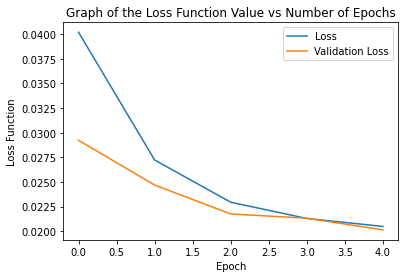

In [25]:
plt.plot(auto_history.history['loss'],label='Loss')
plt.plot(auto_history.history['val_loss'],label='Validation Loss')
plt.title("Graph of the Loss Function Value vs Number of Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss Function")
plt.legend()
plt.show()

#The loss and validation loss are still decreasing so the training can go on for longer
#but it takes too much time. The validation loss is very low so no overtraining occuring either.

cae_prediction = cae.predict(X_test)

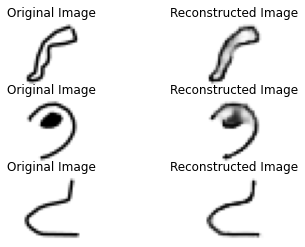

In [26]:
for i in range(3):
    plt.subplot(3,2,2*i+1)
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(3,2,2*i+2)
    plt.imshow(cae_prediction[i],cmap=plt.cm.binary)
    plt.title('Reconstructed Image')
    plt.axis('off')

plt.show()
#These images are surprisingly good as they look very similar to the original!   
#The code struggles with the finer details, where it blurs the small spaces
#between lines

#### 10. Plot images in the laten space
- Predict 10 images into the laten space using the encoder only.
- Reshape the output to images and plot the laten space images. e.g. if your encoder outputs 49 features, make 7x7 image

In [27]:
enc_prediction = encoder.predict(X_test)

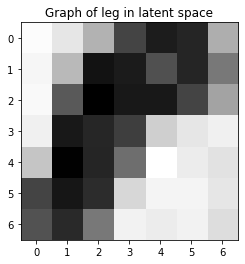

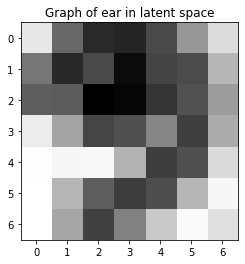

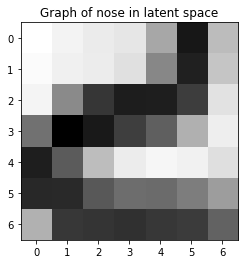

In [28]:
for i in range(3):
    plt.imshow(np.reshape(enc_prediction[i],newshape=(7,7)),cmap=plt.cm.binary)
    plt.title("Graph of "+str(body_parts[int(y_test[i])])+" in latent space")
    plt.show()

#you can see some resemblance of the original image but it is incredibly vague
#due to the lack of pixels.

## Anomaly detection (2 marks)
---

We have introduced auto-encoders as a form of unsupervised learning, since we are not using the image labels during training. This means that auto-encoders are not ideal for image classification (at least not since we actually _have_ the labels), but they can be used for something else: anomaly detection. This is the task of identifying examples that the model considers "anomalous" with respect to the dataset used during training. 

First, we'll load in some "anomalous" data:

In [29]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(shuffle=True)['images']
faces = faces[:,4:-4:2,4:-4:2,np.newaxis]

#### 9. Inspect the face images and the auto-encoder result (1 mark)

* How many samples does the "outlier" dataset (_i.e._ `faces`) contain?
* What is the shape of the images and what is the range of pixel intensities? Does this conform with the preprocessed quickdraw images?
* Display the first few face images.
* Get the output/prediction of the auto-encoder from the previous section when applied to all of the faces.
* Show the auto-encoded versions of the same faces you showed above. Discuss the results.

In [30]:
print(faces.shape) #There are 400 faces with a shape of 28x28 pixels
                   #This is the same shape as the quickdraw images
print("Range of pixel intensity = "+str(np.min(faces))+" -> "+str(np.max(faces))) #same as quickdraw images

(400, 28, 28, 1)
Range of pixel intensity = 0.020661157 -> 0.9710744


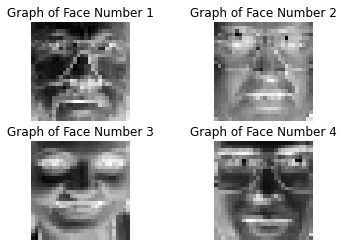

In [31]:
#plotting the first 4 faces
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(faces[i],cmap=plt.cm.binary)
    plt.title("Graph of Face Number "+str(i+1))
    plt.axis('off')
plt.show()

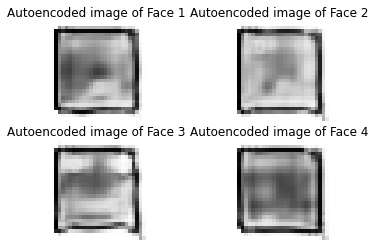

In [50]:
face_prediction = cae.predict(faces)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(face_prediction[i],cmap=plt.cm.binary)
    plt.title("Autoencoded image of Face "+str(i+1))
    plt.axis('off')
plt.show()

The autoencoded images look terrible compared to the original images. There is virtually no resemblance to the original images. Although you can kind of see the eyes and mouth of face 3. The lack of pixels is now very apparent and the neural network has clearly struggled with converting the finer details into latent space. 

_Indicative answers:_
    
* The face images have the same shape and pixel intensity range as the preprocessed quickdraw images, so they are valid inputs to the auto-encoder.
* We can see that the auto-encoder transformed faces are _very_ unlike the input images. This is because the auto-encoder was trained to learn an efficient representation of hand-written digits which is not necessarily an efficient representation for other image domains, _e.g._ faces. This examples shows that this is clearly the case. From the point of view of the auto-encoder, images of faces are _anomalies_ in that they are fundamentally unlike the images on which it was trained, and therefore we shouldn't expect it to do a good job in encoding them.

#### 11. Perform anomaly detection (1 mark)
Imagine now that we had a dataset comprised of mostly quickdraw images, but also a small subset of anomalies or "outliers"; here, in the form of black-and-white images of faceses, with the same shape as the quickdraw images.

In [33]:
# Combined MNIST images and "outliers" in a mixed dataset
mixed = np.vstack((X_test, faces))

# Shuffle the mixed dataset so the "outliers" are randomly distributed
indices = np.random.permutation(mixed.shape[0])
mixed   = mixed[indices]

The auto-encoder was trained to minimise the difference between the original and the auto-encoded image, so let's use binary cross-entropy (BCE) as our metric for the difference between an image and its auto-encoded version. The `binary_crossentropy` method provided below computes **pixel-wise BCE** for two (arrays of) images: the input and the output image.

In [34]:
def binary_crossentropy (img_in, img_out):
    assert img_in.shape == img_out.shape
    eps = np.finfo(float).eps
    img_out = np.clip(img_out, eps, 1. - eps)
    return - (img_in * np.log(img_out) + (1 - img_in) * np.log(1 - img_out))

---
* Define a new method called `difference` which takes as input two arrays of images (`img_in` and `img_out`; similar to the `binary_crossentropy`); computes the **average BCE value for each image,** or row; and returns a vector of these difference measures.
* For each image, or row, in `mixed`, compute the difference score of the auto-encoded image wrt. the original image. This is a measure of how "inlier"- or "outlier"-like an image is.
* Make a histogram of these scores, and see if you can identify any structure. It might be useful to use a logarithmic x-axis (see `plt.xscale`) along with logarithmic x-axis bins (see `np.logspace`).
* Show the 9 least and the 9 most outlying images, according to this difference score. Discuss the results.

In [35]:
def difference(img_in,img_out):
    average_bce = np.mean(binary_crossentropy(img_in, img_out),axis=(1,2))
    return average_bce

aencmixed = cae.predict(mixed)
diff = difference(mixed,aencmixed)

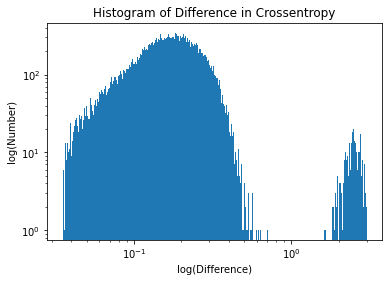

In [45]:
plt.hist(diff,bins=np.logspace(np.log10(0.035),np.log10(3),500),log=True)
plt.xscale('log')
plt.title('Histogram of Difference in Crossentropy')
plt.xlabel('log(Difference)')
plt.ylabel('log(Number)')
plt.show()

In [37]:
#Note: this question was ambiguous in what it meant by "outlier" as I initially
#assumed it was outlier from the mean value but I was later told it was simply
#the lowest and highest value. Just in case the question did mean it this way, 
#I've still got the code commented in this cell.

#Calculating Deviation from Mean:

#average_position = np.mean(diff)                  #Finding the average difference value
#deviation = np.abs(diff-average_position)         #Finding the deviation of the mean for each value in diff
#ordered_dev = np.argsort(deviation,axis=0)        #Ordering it to find maxima and minima
#closest = mixed[np.hstack(ordered_dev[0:9])]      #Images closest to mean 9 elements
#furthest = mixed[np.hstack(ordered_dev[-10:-1])]  #Images furthest to mean 9 elements

In [38]:
#Finding the 9 furthest and 9 closest outliers:

sorted_positions = np.argsort(diff,axis=0)            #Sorts images by argument
lowest = mixed[np.hstack(sorted_positions[0:9])]      #9 images with lowest difference
highest = mixed[np.hstack(sorted_positions[-10:-1])]  #9 images with highest difference

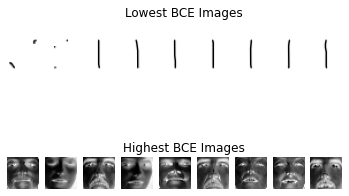

In [40]:
for i in range(len(lowest)):
    plt.subplot(2,9,i+1)
    plt.imshow(lowest[i],cmap=plt.cm.binary)
    plt.axis('off')

plt.title("Lowest BCE Images",x=-4,y=1.5)

for i in range(len(highest)):
    plt.subplot(2,9,10+i)
    plt.imshow(highest[i],cmap=plt.cm.binary)
    plt.axis('off')

plt.title("Highest BCE Images",x=-4)
plt.show()

We can see from the images that the ones with the lowest BCE are the simplest -- merely dots and straight lines. These are the simplest drawings which means the neural network can draw these the easiest and thus have the lowest loss functions. The faces, on the other hand, have the highest BCE values which is expected as they are the most complex to draw so the neural network struggles to reconstruct them. 

In fact, looking at the histogram, we can see a clear segregation between the drawn images and the facial images which are represented by the big peak on the left and the small peak on the right, respectively. The loss function is much higher for faces than for drawings which implies that we'll require a considerably more complex neural network before we can start reconstructing faces.